# Fire Size Class Prediction

In [1]:
# If a library is missing on your system, you can install it with the command :
# ! pip install <library name>
# For instance (remove # on the following line before executing)
# ! pip install pandas

If you face an error when running the previous command line, try :
- `! pip install --proxy=http://cias3basic.conti.de:8080/wpad.dat <library name>`
- you may also want to run the install command by deactivating the VPN connection, multiple people have reported facing difficulties downloading packages due to firewalls.

## 1. Data preparation

### 1.1 Data loading

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

For this challenge, the division of the database into training and test datasets is not your responsibility. We provide you with the 2 separate CSV files.
CSV files can be easily read with the Pandas library. The resulting object is called a DataFrame.

For more info about the DataFrame object and functions, you can go here : https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,fire_number,fire_year,assessment_datetime,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,activity_class,true_cause,...,start_for_fire_date,fire_fighting_start_date,initial_action_by,fire_type,fire_position_on_slope,weather_conditions_over_fire,fuel_type,bh_fs_date,uc_fs_date,ex_fs_date
0,CWF142,2017,2017-07-03 11:20:00,A,51.409700,-115.083667,Provincial Land,Recreation,Cooking and Warming,Unsafe Fire,...,2017-07-03 11:20:00,2017-07-03 11:20:00,FPD Staff,NaN,NaN,NaN,NaN,2017-07-03 11:20:00,2017-07-03 11:20:00,2017-07-03 11:25:00
1,HWF060,2014,2014-06-01 16:44:00,B,57.436300,-116.648417,Provincial Land,Lightning,NaN,NaN,...,2014-06-01 16:17:00,2014-06-01 16:47:00,HAC,Surface,Flat,Cloudy,C2,2014-06-01 17:36:00,2014-06-01 17:36:00,2014-06-01 19:21:00
2,HWF140,2009,2009-06-14 17:05:00,B,58.426717,-114.555550,Indian Reservation,Lightning,NaN,NaN,...,2009-06-14 17:00:00,2009-06-14 18:00:00,HAC1F,Surface,Upper 1/3,CB Dry,C2,2009-06-14 19:09:00,2009-06-15 21:30:00,2009-06-16 11:00:00
3,CWF098,2013,2013-05-20 13:45:00,A,51.413100,-115.084867,Provincial Land,Recreation,Cooking and Warming,Unsafe Fire,...,2013-05-20 13:45:00,2013-05-20 13:45:00,HAC,NaN,NaN,NaN,NaN,2013-05-20 13:45:00,2013-05-20 13:45:00,2013-05-20 14:00:00
4,SWF001,2009,2009-04-16 14:15:00,A,55.905933,-113.578850,Indian Reservation,Resident,Piles,Permit Related,...,2009-04-16 13:03:00,2009-04-16 14:15:00,FPD Staff,Surface,Flat,Clear,C2,2009-04-16 16:09:00,2009-04-16 16:09:00,2009-04-17 11:30:00


In [2]:
test = pd.read_csv('test.csv')
test.head()

,fire_number,fire_year,assessment_datetime,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,activity_class,true_cause,fire_start_date,...,start_for_fire_date,fire_fighting_start_date,initial_action_by,fire_type,fire_position_on_slope,weather_conditions_over_fire,fuel_type,bh_fs_date,uc_fs_date,ex_fs_date
0,CWF169,2008,2008-09-01 14:19:00,50.851383,-114.619033,Provincial Land,Recreation,Cooking,Abandoned Fire,2008-09-01 08:00:00,...,2008-09-01 14:19:00,2008-09-01 14:19:00,FPD Staff,Surface,Flat,Cloudy,NaN,2008-09-01 14:19:00,2008-09-01 14:19:00,2008-09-01 14:44:00
1,WWF031,2008,2008-06-01 19:49:00,54.186250,-115.175200,Provincial Land,Recreation,All Terrain Vehicles,Burning Substance,2008-06-01 18:40:00,...,2008-06-01 19:27:00,2008-06-01 19:55:00,HAC1H,Surface,Flat,Clear,M2,2008-06-01 20:49:00,2008-06-02 12:30:00,2008-06-03 15:59:00
2,GWF043,2006,2006-05-07 12:25:00,55.064667,-117.813383,Provincial Land,Recreation,Cooking,Abandoned Fire,2006-05-06 17:00:00,...,2006-05-07 12:25:00,2006-05-07 12:25:00,FPD Staff,Surface,Flat,Cloudy,NaN,2006-05-07 12:25:00,2006-05-07 12:25:00,2006-05-07 12:26:00
3,PWF010,2012,2012-05-08 20:43:00,57.182267,-117.233117,Private Land,Agriculture Industry,Debris Disposal,Winter Burning,2012-02-01 12:00:00,...,2012-05-08 20:43:00,NaN,Land Owner,Surface,Flat,Cloudy,S2,2012-05-08 21:52:00,2012-05-09 13:44:00,2012-05-18 15:23:00
4,EWF035,2008,2008-05-11 16:46:00,53.576885,-115.131380,Private Land,Resident,Grass,Unpredictable Event,2008-05-11 14:00:00,...,2008-05-11 14:38:00,NaN,Fire Department,Surface,Flat,Cloudy,O1a,2008-05-11 16:46:00,2008-05-11 16:46:00,2008-05-11 16:47:00


As you can see, the test dataset does not contain the size_class, it will be your objective to predict it.

We can print the dataset sizes as well :

In [3]:
print('Train set size:', train.shape)
print('Test set size:', test.shape)

Train set size: (15875, 25)
Test set size: (3969, 24)


### 1.2 Feature selection

Pay attention that our features are of different types - some of them are numeric, some are categorical, and some are even just strings, which normally should be handled in some specific way.

Indeed, categorical data are commonplace in many Data Science and Machine Learning problems but are usually more challenging to deal with than numerical data. In particular, many machine learning algorithms require that their input is numerical and therefore categorical features must be transformed into numerical features before we can use any of these algorithms.

In [4]:
print(train.dtypes)

fire_number                      object
fire_year                         int64
assessment_datetime              object
size_class                       object
fire_location_latitude          float64
fire_location_longitude         float64
fire_origin                      object
general_cause_desc               object
activity_class                   object
true_cause                       object
fire_start_date                  object
det_agent_type                   object
det_agent                        object
discovered_date                  object
reported_date                    object
start_for_fire_date              object
fire_fighting_start_date         object
initial_action_by                object
fire_type                        object
fire_position_on_slope           object
weather_conditions_over_fire     object
fuel_type                        object
bh_fs_date                       object
uc_fs_date                       object
ex_fs_date                       object


For getting started with a simple model, we will only use 2 numerical features (fire_location_latitude, fire_location_longitude) and add a few categorical features (fire_origin, true_cause, fire_type, fuel_type, weather_conditions_over_fire).

Now let's separate features and label variable. In most ML scenarios, X refers to the array of features and y is the variable to be predicted.

In [5]:
X = train[['fire_location_latitude', 'fire_location_longitude', 'fire_origin', 'true_cause', 'fire_type', 'weather_conditions_over_fire', 'fuel_type']]
X.head()

,fire_location_latitude,fire_location_longitude,fire_origin,true_cause,fire_type,weather_conditions_over_fire,fuel_type
0,51.409700,-115.083667,Provincial Land,Unsafe Fire,NaN,NaN,NaN
1,57.436300,-116.648417,Provincial Land,NaN,Surface,Cloudy,C2
2,58.426717,-114.555550,Indian Reservation,NaN,Surface,CB Dry,C2
3,51.413100,-115.084867,Provincial Land,Unsafe Fire,NaN,NaN,NaN
4,55.905933,-113.578850,Indian Reservation,Permit Related,Surface,Clear,C2


In this challenge, the goal is to predict the __size class__ of the burned area, which consists in various classes :

In [6]:
y = train['size_class']
y.unique()

array(['A', 'B', 'D', 'E', 'C'], dtype=object)

This is a __supervised classification problem__ with 5 classes to predict :
- A class = 0 to 0.1 ha (1 hectare = 10000 sq meters = 2.5 acres)
- B class > 0.1 ha to 4.0 ha
- C class > 4.0 ha to 40.0 ha
- D class > 40.0 ha to 200 ha
- E class > 200 ha

To learn more about the different types of problems in Machine Learning, you can go here :
https://www.softwaretestinghelp.com/types-of-machine-learning-supervised-unsupervised/

### 1.3 Dealing with missing values

Let's check how many absent values do we have:

In [7]:
null_value_stats = X.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

fire_origin                        7
true_cause                      7194
fire_type                       1819
weather_conditions_over_fire    1893
fuel_type                       4793
dtype: int64

As you can see, some features indeed have missing values.

Missing Value treatment becomes important since the data insights or the performance of your predictive model could be impacted if the missing values are not appropriately handled.

For now, let's just fill them with some arbitrary value so that the model would be able to easily distinguish between them and take it into account :

In [8]:
X = X.fillna('Unknown') # str

### 1.4 Data Splitting

A validation dataset is a sample of data held back from training your model that is used to give an estimate of model performance while tuning model’s hyperparameters.

There is much confusion in applied ML about what a validation dataset is exactly and how it differs from a test dataset. Long story short :
- The validation dataset is predominately used to describe the evaluation of models when tuning hyperparameters and data preparation
- The test dataset is predominately used to describe the evaluation of a final tuned model when comparing it to other final models.

A good justification of this method can be found here : https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

So let's split the train data into training and validation sets :

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=42)

### 1.5 Categorical feature encoding

As mentioned before, many machine learning algorithms require that their input is numerical and therefore categorical features must be transformed into numerical features before we can use any of these algorithms.

One of the most common ways to make this transformation is to __one-hot encode__ the categorical features, especially when there does not exist a natural ordering between the categories (e.g. a feature ‘City’ with names of cities such as ‘London’, ‘Lisbon’, ‘Berlin’, etc.). For each unique value of a feature (say, ‘London’) one column is created (say, ‘City_London’) where the value is 1 if for that instance the original feature takes that value and 0 otherwise.

A simple way to make this transformation is to use the category encoders library : http://contrib.scikit-learn.org/category_encoders/

In [10]:
import category_encoders as ce

ohe = ce.OneHotEncoder(handle_unknown='value', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe.sample(5)

,fire_location_latitude,fire_location_longitude,fire_origin_Provincial Land,fire_origin_Private Land,fire_origin_Indian Reservation,fire_origin_Metis Settlement,fire_origin_Provincial Park,fire_origin_DND,fire_origin_Unknown,fire_origin_National Park,...,fuel_type_M1,fuel_type_O1a,fuel_type_C1,fuel_type_O1b,fuel_type_M2,fuel_type_S1,fuel_type_C3,fuel_type_C7,fuel_type_C4,fuel_type_M3
9405,55.260683,-116.928917,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14489,55.451283,-111.110100,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2871,55.961500,-115.495667,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10867,57.372433,-116.808533,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,57.993667,-115.130167,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


When we try to transform the test set, after having fitted the encoder to the training set, we may obtain a ValueError. This is because there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the __same number of columns__. 

This last problem can be solved by using the option `handle_unknown='value'` of the OneHotEncoder, which will ignore previously unseen values when transforming the test set and fill the resulting one-hot encoded columns for this feature with zeros.

In [11]:
X_valid_ohe = ohe.transform(X_valid)
X_valid_ohe.sample(5)

,fire_location_latitude,fire_location_longitude,fire_origin_Provincial Land,fire_origin_Private Land,fire_origin_Indian Reservation,fire_origin_Metis Settlement,fire_origin_Provincial Park,fire_origin_DND,fire_origin_Unknown,fire_origin_National Park,...,fuel_type_M1,fuel_type_O1a,fuel_type_C1,fuel_type_O1b,fuel_type_M2,fuel_type_S1,fuel_type_C3,fuel_type_C7,fuel_type_C4,fuel_type_M3
8814,56.438733,-111.186150,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13413,53.508067,-117.262617,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3682,59.350150,-117.990333,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15176,58.522300,-117.083267,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8139,54.839850,-111.425300,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As remarked previously, one-hot encoding is not the only possible way to encode categorical features and the category encoders library has several encoders which you should explore, as others might be more appropriate for different categorical features and machine learning problems.

## 2. Model Training

For this example, we will use the DecisionTreeClassifier from scikit-learn, which belongs to the family of supervised learning algorithms.

The goal of using a Decision Tree is to create a training model able to predict the class or value of the target variable by learning simple decision rules inferred from prior data (training data). To learn more about this algorithm :
https://www.mygreatlearning.com/blog/decision-tree-algorithm/

Note that we fixed the random_state value only to make the results reproducible for this notebook.

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_ohe, y_train)

DecisionTreeClassifier(random_state=42)

You can get a look at the feature importances and plot the decision tree as well.

### 2.1 Feature importance

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable :

In [13]:
importance = pd.DataFrame()
importance['Feature'] = X_train_ohe.columns
importance['Importance'] = model.feature_importances_
importance.set_index('Feature', inplace=True)

importance.sort_values(by='Importance', ascending=False)

,Importance
Feature,
fire_location_longitude,0.313084
fire_location_latitude,0.311863
fuel_type_Unknown,0.097498
fire_type_Crown,0.019567
weather_conditions_over_fire_Cloudy,0.016305
true_cause_Unknown,0.015887
weather_conditions_over_fire_Clear,0.015760
fuel_type_C2,0.013751
weather_conditions_over_fire_CB Dry,0.011176


The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

### 2.2 Plotting Tree

For clarity and in order to save time, we will only generate the first 3 levels of the tree. If `max_depth=None`, the tree is fully generated.

For this baseline model, it takes about 8 min to plot the full decision tree, but the result is horrible and practically unreadable !

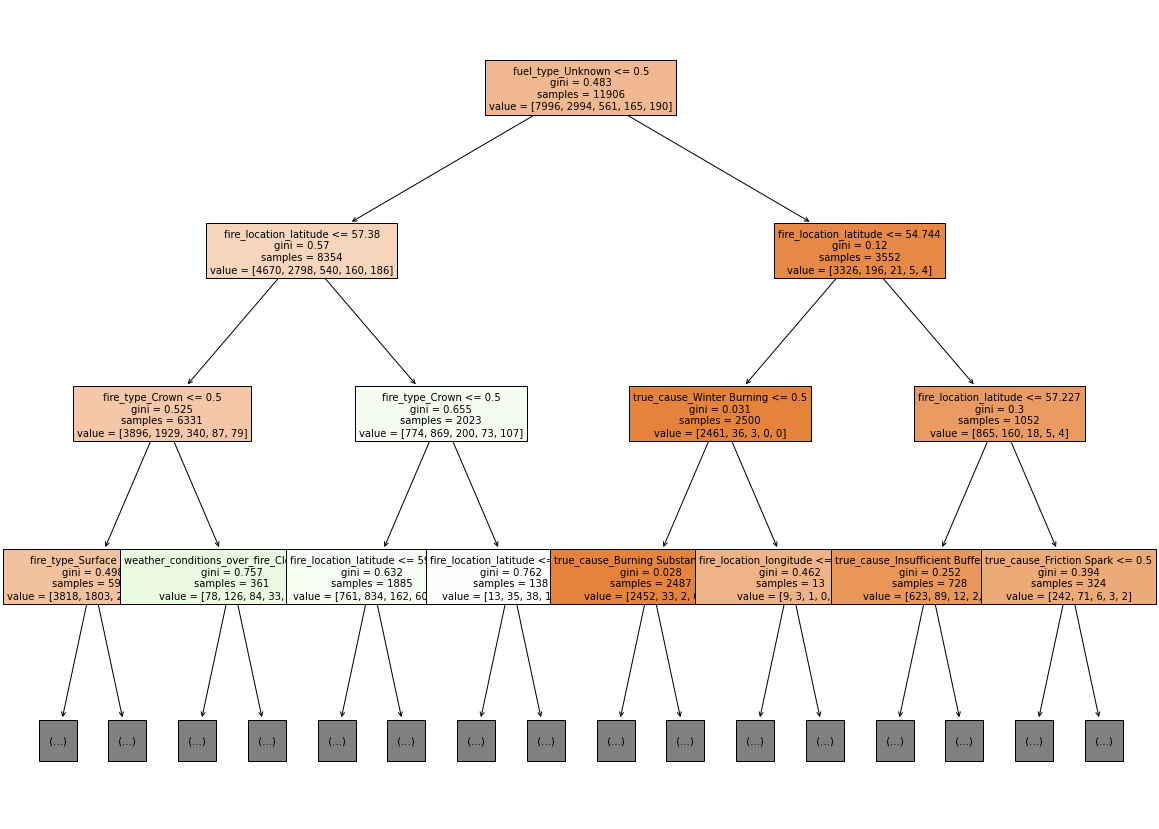

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(model, max_depth=3, feature_names=X_train_ohe.columns, filled=True, fontsize=10)
plt.show()

## 3. Model Validation

### 3.1 Predict on Validation dataset
All you have to do to get predictions on your validation set is :

In [15]:
y_valid_pred = model.predict(X_valid_ohe)

### 3.2 Evaluation

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.

In [16]:
from sklearn.metrics import accuracy_score

print('Validation accuracy score:', accuracy_score(y_valid, y_valid_pred))

Validation accuracy score: 0.6331569664902998


A problem with this metric is that it doesn't take in consideration the fact that some classes are more represented than others, and unfortunately, it can actually lead to biased results.

In [17]:
pd.DataFrame(y_valid, columns=['size_class'])['size_class'].value_counts()

A    2683
B    1006
C     173
E      56
D      51
Name: size_class, dtype: int64

Indeed, most machine learning algorithms assume data is equally distributed. So when we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class.

To get a deeper understanding of this problem, you can go here : https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4

So in order to weight all classes equally, the evaluation metric for this challenge will be the __macro-average F1-score__ from scikit-learn :

In [18]:
from sklearn.metrics import f1_score

print('Macro F1-score:', f1_score(y_valid, y_valid_pred, average='macro'))

Macro F1-score: 0.2980819991882956


Note that the F1-score with uniform weights is lower (0.29) than the overall accuracy (0.63) because it gives equal contribution to the predictive performance for the five classes, independent of their number of observations.

__Remember that this metric should be maximized.__

A confusion matrix is also a predictive analytics tool. Specifically, it is a table that displays and compares actual values with the model’s predicted values. Within the context of machine learning, a confusion matrix is utilized as a metric to analyze how a machine learning classifier performed on a dataset.

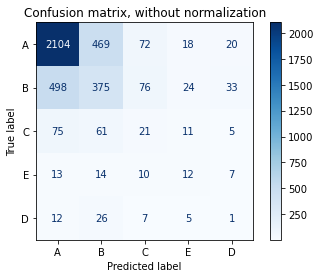

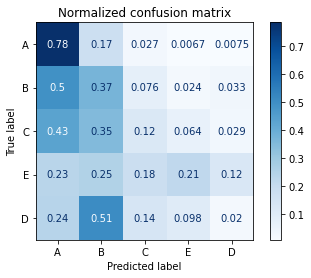

In [19]:
from sklearn.metrics import plot_confusion_matrix

class_names = y_valid.unique()

# Plot non-normalized and normalized confusion matrices
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_valid_ohe, y_valid,
                                 labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

The classes that the model predicted correctly can be read on the diagonal on the matrix.

## 4. Make submission

### 4.1 Predict on Test dataset
Now we would re-train our model on all train data that we have.

In [20]:
# Categorical Feature Encoding
X_ohe = ohe.fit_transform(X)

# Model Training
model.fit(X_ohe, y)

DecisionTreeClassifier(random_state=42)

Don't forget to apply the same data transformations you used on your training set before applying the model on your test set:

In [21]:
# Feature Selection
X_test = test[['fire_location_latitude', 'fire_location_longitude', 'fire_origin', 'true_cause', 'fire_type', 'weather_conditions_over_fire', 'fuel_type']]

# Missing values treatment
X_test = X_test.fillna('Unknown') # str
X_test.head()

,fire_location_latitude,fire_location_longitude,fire_origin,true_cause,fire_type,weather_conditions_over_fire,fuel_type
0,50.851383,-114.619033,Provincial Land,Abandoned Fire,Surface,Cloudy,Unknown
1,54.186250,-115.175200,Provincial Land,Burning Substance,Surface,Clear,M2
2,55.064667,-117.813383,Provincial Land,Abandoned Fire,Surface,Cloudy,Unknown
3,57.182267,-117.233117,Private Land,Winter Burning,Surface,Cloudy,S2
4,53.576885,-115.131380,Private Land,Unpredictable Event,Surface,Cloudy,O1a


In [22]:
# Categorical Feature Encoding
X_test_ohe = ohe.transform(X_test)
X_test_ohe.sample(5)

,fire_location_latitude,fire_location_longitude,fire_origin_Provincial Land,fire_origin_Indian Reservation,fire_origin_Private Land,fire_origin_DND,fire_origin_Metis Settlement,fire_origin_Provincial Park,fire_origin_Unknown,fire_origin_National Park,...,fuel_type_M1,fuel_type_C4,fuel_type_S1,fuel_type_O1b,fuel_type_C3,fuel_type_D1,fuel_type_C1,fuel_type_C7,fuel_type_M4,fuel_type_M3
2669,55.952633,-113.817383,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,59.202000,-119.705833,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,58.518331,-116.741169,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2314,51.316467,-115.214417,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1086,51.266450,-114.967650,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And finally let's prepare the submission file:

In [30]:
y_test_pred = pd.DataFrame()
y_test_pred['fire_number'] = test['fire_number']
y_test_pred['size_class'] = model.predict(X_test_ohe)

y_test_pred.head()

,fire_number,size_class
0,CWF169,A
1,WWF031,B
2,GWF043,A
3,PWF010,B
4,EWF035,A


In [24]:
print(y_test_pred.shape)

(3969, 2)


You should have 3969 rows in your submission file.

### 4.2 Push the prediction to CARINO platform

First you need to set the TOKEN value to the value you will find on the platform under the _Submissions_ tab :

In [25]:
import math
import requests

TOKEN = 'bef13dde60939ab809582f85a2518337f4eee028e2ea385cf64831961737072d977ed884b5c4e58821b1e5f1f5376aa2f6afecacab61ea9ecf406c89cc1e19cf' # Replace with 'your token' (please ensure value is between quotes)
comment = 'some comment' # Free text, visible by you only

def submit_prediction(df, TOKEN=None, sep=',', comment='', compression='gzip', **kwargs):
    if TOKEN is None:
        print("Please set TOKEN to the value provided in CARINO plarform under Submissions tab")
        return None
    URL='http://18.185.86.47/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} minutes.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0 / 60.0))))
    if r.status_code != 200:
        raise Exception(r.text)

You can then submit your results as follows :

In [27]:
#submit_prediction(y_test_pred, TOKEN, sep=',', index=True, comment=comment)

You should now be able to check your score on the CARINO platform.

Note that you can save your predictions as a CSV file and upload it manually on the platform under the _Submissions_ tab later as well :

In [28]:
#y_test_pred.to_csv('submission.csv', index=False)

That's it ! Now you can play around with other models, add some feature engineering and try to improve your score ! :)